本文将用于计算校准曲线，会向您介绍如何使用 python 绘制一组数据点的图形，然后将这些点拟合成函数。重点是创建校准曲线，首先使用标准方法，然后使用标准添加方法。不过，在我们在 python 中做任何事情之前，最好先导入我们需要的库。本文中，我们将使用 numpy库 来进行非线性拟合，使用 matplotlib库 来创建我们的图形，并使用 scipy库 的统计包来计算线性拟合方式。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

考虑一系列标准解决方案与仪器测量信号之间的以下关系：

| 银离子浓度 (ppb) | 信号 (arb.) |
|:--------:|:--------:|
| 0.00 | 0.000 |
| 2.00 | 0.013 |
| 10.0 | 0.076 |
| 20.0 | 0.162 |
| 30.0 | 0.245 |
| 50.0 | 0.405 |
| 75.0 | 0.598 |
| 100.0 | 0.748 |
| 125.0 | 0.817 |
| 150.0 | 0.872 |

为了创建校准曲线，我们首先创建两个列表。第一个是我们的x值，将是银离子浓度，第二个是我们的y值，将是信号。然后我们可以绘制这些点。

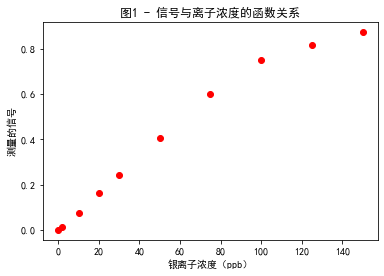

In [3]:
xrange = [0,2,10,20,30,50,75,100,125,150]
yrange = [0,0.013,0.076,0.162,0.245,0.405,0.598,0.748,0.817,0.872]
plt.plot(xrange,yrange,'ro')
plt.title("图1 - 信号与离子浓度的函数关系")
plt.xlabel('银离子浓度（ppb）')
plt.ylabel('测量的信号')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

现在，我将使用从 scipy 库的统计部分导入的 linregress（） 函数找到点的线性拟合。此外，由于校准曲线的上端有一些曲率，我将使用一个变量（我称之为 listend）来定义将包含在线性拟合中的最后一个点。

拟合的线性方程为 y = 6.9437E-03 x + 2.2576E-02，R的平方为 0.98481。


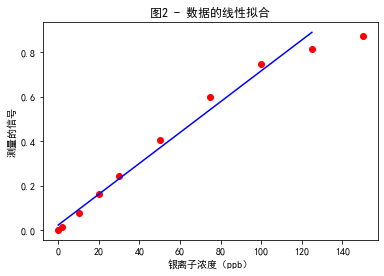

In [6]:
listend = len(xrange)-1
xsubrange = xrange[0:listend]
ysubrange = yrange[0:listend]
slope,intercept,r,tt,stderr=stats.linregress(xsubrange,ysubrange)
print("拟合的线性方程为 y = {0:1.4E} x + {1:1.4E}，R的平方为 {2:1.5f}。".format(slope, intercept, r**2))
linfit = [i*slope + intercept for i in xsubrange]
plt.plot(xrange,yrange,'ro')
plt.plot(xsubrange,linfit,'b-')
plt.title("图2 - 数据的线性拟合")
plt.xlabel('银离子浓度（ppb）')
plt.ylabel('测量的信号')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

尝试使用listend变量，看看改变我们绘制的点如何改变线性拟合的R$^{2}$值。此外，更改图形，使点为蓝色圆圈，线为红色虚线。您需要使用上面代码单元格中的两个 plt.plot（） 函数进行这些更改。

现在让我们尝试将其拟合到高阶多项式。请记住，您应该有一个*理由*将数据拟合到高阶多项式，但有时需要这样做。下面，我将展示如何使用 numpy 库中的 polyfit 函数将数据点拟合到 2$^{textrm{nd}}$ 阶多项式，而不仅仅是一条线。

此函数的曲线拟合为 y = -2.78E-05 x^2 + 1.02E-02 x + -1.74E-02。


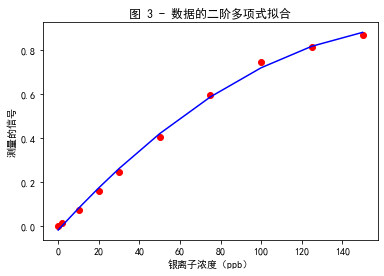

In [7]:
two_deg_fit = np.polyfit(xrange,yrange,2)
print("此函数的曲线拟合为 y = {0:.2E} x^2 + {1:.2E} x + {2:.2E}。".format(two_deg_fit[0], two_deg_fit[1], two_deg_fit[2]))
curvefit = [two_deg_fit[0]*i**2 + two_deg_fit[1]*i + two_deg_fit[2] for i in xrange]
plt.plot(xrange,yrange,'ro')
plt.plot(xrange,curvefit,'b-')
plt.title("图 3 - 数据的二阶多项式拟合")
plt.xlabel('银离子浓度（ppb）')
plt.ylabel('测量的信号')
plt.show()

在下面的代码框中，将数据点拟合为3$^{\textrm{rd}}$ 阶多项式，打印出函数，并使用拟合曲线绘制数据。为此，我建议从上面的 2$^{\textrm{nd}}$ 顺序中复制代码，重命名内容以使其有意义，并进行一些小的修改。例如，np.polyfit（） 函数中的一个条目指示将数据拟合到哪个顺序函数。您还必须向 print（） 函数和曲线拟合定义再添加一个部分才能获得 x$^{3}$ 部分。最后，确保正确标记轴，并为图形指定标题。

现在，让我们尝试将您学到的知识付诸行动，使用标准添加方法计算未知溶液中的 [Ag$^{+}$] 浓度。对于一系列标准添加，请考虑以下数据：


| Solution | A | B | C | D | E |
|----------|---|---|---|---|---|
| mL 未知 | 10.00 | 10.00 | 10.00 | 10.00 | 10.00 |
| mL 标准 | 0 | 5.00 | 10.00 | 15.00 | 20.00 |
| 添加的银离子浓度分析物（ppb） | 0 | 6.0 | 12 | 18 | 24 |
| 吸光度 | 0.11 | 0.29 | 0.48 | 0.72 | 0.91 |

将测得的吸光度绘制成添加的分析物浓度的函数图，确保标记轴，并找到数据的线性拟合。

从您上面找到的拟合度来看，未知溶液中银的浓度是多少？基于这个浓度，未知的银离子的质量是多少？